In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('brain_size.csv', sep=';', na_values=".")

In [3]:
df.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [4]:
df.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [5]:
df[['Weight', 'Height','FSIQ', 'VIQ', 'MRI_Count']].describe()

,Weight,Height,FSIQ,VIQ,MRI_Count
count,38.000000,39.000000,40.000000,40.000000,4.000000e+01
mean,151.052632,68.525641,113.450000,112.350000,9.087550e+05
std,23.478509,3.994649,24.082071,23.616107,7.228205e+04
min,106.000000,62.000000,77.000000,71.000000,7.906190e+05
25%,135.250000,66.000000,89.750000,90.000000,8.559185e+05
50%,146.500000,68.000000,116.500000,113.000000,9.053990e+05
75%,172.000000,70.500000,135.500000,129.750000,9.500780e+05
max,192.000000,77.000000,144.000000,150.000000,1.079549e+06


In [6]:
df[df['Gender']=='Female'][["FSIQ", "VIQ"]].describe()

,FSIQ,VIQ
count,20.000000,20.000000
mean,111.900000,109.450000
std,23.686327,21.670924
min,77.000000,71.000000
25%,90.250000,90.000000
50%,115.500000,116.000000
75%,133.000000,129.000000
max,140.000000,136.000000


In [7]:
groupby_gender = df.groupby('Gender')
groupby_gender.describe()

Unnamed: 0                                                   FSIQ  \
            count   mean        std  min    25%   50%    75%   max count   
Gender                                                                     
Female       20.0  19.65  11.356774  1.0  10.25  18.0  29.25  38.0  20.0   
Male         20.0  21.35  12.248630  2.0  11.50  21.5  32.25  40.0  20.0   

               ...  Height       MRI_Count                                   \
         mean  ...     75%   max     count      mean          std       min   
Gender         ...                                                            
Female  111.9  ...  66.875  70.5      20.0  862654.6  55893.55578  790619.0   
Male    115.0  ...  73.750  77.0      20.0  954855.4  55911.35471  879987.0   

                                                  
              25%       50%       75%        max  
Gender                                            
Female  828062.00  855365.0  882668.5   991305.0  
Male    919529.25  947241.5  973496.0  1079549.0  

[2 rows x 56 columns]

In [8]:
groupby_gender = df.groupby('Gender')
df1 = groupby_gender.describe()
df_transposed = df1.T
df_transposed

Gender                   Female          Male
Unnamed: 0 count      20.000000  2.000000e+01
           mean       19.650000  2.135000e+01
           std        11.356774  1.224863e+01
           min         1.000000  2.000000e+00
           25%        10.250000  1.150000e+01
           50%        18.000000  2.150000e+01
           75%        29.250000  3.225000e+01
           max        38.000000  4.000000e+01
FSIQ       count      20.000000  2.000000e+01
           mean      111.900000  1.150000e+02
           std        23.686327  2.498631e+01
           min        77.000000  8.000000e+01
           25%        90.250000  8.975000e+01
           50%       115.500000  1.180000e+02
           75%       133.000000  1.392500e+02
           max       140.000000  1.440000e+02
VIQ        count      20.000000  2.000000e+01
           mean      109.450000  1.152500e+02
           std        21.670924  2.564099e+01
           min        71.000000  7.700000e+01
           25%        90.000000  9.525000e+01
           50%       116.000000  1.105000e+02
           75%       129.000000  1.450000e+02
           max       136.000000  1.500000e+02
PIQ        count      20.000000  2.000000e+01
           mean      110.450000  1.116000e+02
           std        21.946046  2.354033e+01
           min        72.000000  7.400000e+01
           25%        93.000000  8.600000e+01
           50%       115.000000  1.170000e+02
           75%       128.750000  1.280000e+02
           max       147.000000  1.500000e+02
Weight     count      20.000000  1.800000e+01
           mean      137.200000  1.664444e+02
           std        16.953807  2.004766e+01
           min       106.000000  1.320000e+02
           25%       125.750000  1.487500e+02
           50%       138.500000  1.720000e+02
           75%       146.250000  1.807500e+02
           max       175.000000  1.920000e+02
Height     count      20.000000  1.900000e+01
           mean       65.765000  7.143158e+01
           std         2.288248  3.283131e+00
           min        62.000000  6.630000e+01
           25%        64.500000  6.890000e+01
           50%        66.000000  7.050000e+01
           75%        66.875000  7.375000e+01
           max        70.500000  7.700000e+01
MRI_Count  count      20.000000  2.000000e+01
           mean   862654.600000  9.548554e+05
           std     55893.555780  5.591135e+04
           min    790619.000000  8.799870e+05
           25%    828062.000000  9.195292e+05
           50%    855365.000000  9.472415e+05
           75%    882668.500000  9.734960e+05
           max    991305.000000  1.079549e+06

In [13]:
#If you want to run individual descriptive functions then type the following (including skewness and kurtosis)

groupby_gender = df.groupby('Gender')
print("Mean by Gender")
print(groupby_gender.mean())
print("\n")

print("Median by Gender")
print(groupby_gender.median())
print("\n")

print("Describe FSIQ and VIQ  by Gender")
df1 = groupby_gender[['FSIQ','VIQ']].describe()
df_transposed = df1.T
print(df_transposed)
print("\n")

print("Skewness by Gender")
df2 = groupby_gender.skew()
df2_transposed = df2.T
print(df2_transposed)
print("\n")


print("Kurtosis by Gender")
df3 = pd.DataFrame(df)
print(df3.groupby('Gender').apply(pd.DataFrame.kurt))
print("\n")

Mean by Gender
        Unnamed: 0   FSIQ     VIQ     PIQ      Weight     Height  MRI_Count
Gender                                                                     
Female       19.65  111.9  109.45  110.45  137.200000  65.765000   862654.6
Male         21.35  115.0  115.25  111.60  166.444444  71.431579   954855.4


Median by Gender
        Unnamed: 0   FSIQ    VIQ    PIQ  Weight  Height  MRI_Count
Gender                                                            
Female        18.0  115.5  116.0  115.0   138.5    66.0   855365.0
Male          21.5  118.0  110.5  117.0   172.0    70.5   947241.5


Describe FSIQ and VIQ  by Gender
Gender          Female        Male
FSIQ count   20.000000   20.000000
     mean   111.900000  115.000000
     std     23.686327   24.986312
     min     77.000000   80.000000
     25%     90.250000   89.750000
     50%    115.500000  118.000000
     75%    133.000000  139.250000
     max    140.000000  144.000000
VIQ  count   20.000000   20.000000
     mean

/var/folders/bx/s6_8c2gn6b37mrn08wytzt6r0000gn/T/ipykernel_2441/235165978.py:27: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df3.groupby('Gender').apply(pd.DataFrame.kurt))


In [14]:
#h.	Frequency count for male and female in the dataset for all the columns. 

print('\n')
print('Number of Females in the Dataset')
print(df[df['Gender'] == 'Female'].count())

print('\n')
print('Number of Males in the Dataset')
print(df[df['Gender'] == 'Male'].count())




Number of Females in the Dataset
Unnamed: 0    20
Gender        20
FSIQ          20
VIQ           20
PIQ           20
Weight        20
Height        20
MRI_Count     20
dtype: int64


Number of Males in the Dataset
Unnamed: 0    20
Gender        20
FSIQ          20
VIQ           20
PIQ           20
Weight        18
Height        19
MRI_Count     20
dtype: int64


In [16]:
#You would like to compare the VIQ mean of a sample to a specific number or a population mean (the first example is 0)

from scipy import stats

df = pd.read_csv('brain_size.csv', sep=';', na_values=".")
stats.ttest_1samp(df['VIQ'], 0)  

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [1]:
#Interpretation of the Output
#Two values are found in the output: 
#tvalue = 30.088 (3 decimal places)
#pvalue = 1.3289196468728067e-28 (this means 1.3289196468728067 x 10 to the power of -28
             
#We can choose the following confidence level values:
#i.Confidence Level (95%) or alpha value, = 0.05
#ii.Confidence Level (98%) or alpha value, = 0.02
#iii.Confidence Level (99%) or alpha value, = 0.01

#We choose a two-tail t-test
#Null Hypothesis (H0): mean of VIQ = 0;
#Alternative Hypothesis (Ha): mean of VIQ  ≠ 0

#The distribution:
#i.Choose: Confidence Level (95%) or alpha value,  = 0.05
#ii.It is a two-tailed test, therefore, /2 = 0.05/2 = 0.025
#iii.The displayed p value is 1.3289196468728067e-28 < /2 = 0.025, therefore it falls in the Reject Ho region. Therefor the conclusion is: mean of VIQ is not equal to 0.


In [2]:
#Type 2:Two-Sample T-Test
#You would like to compare the means of Female FSIQ and Male FSIQ.

import pandas as pd
from scipy import stats

dataset = pd.read_csv('brain_size.csv', sep=';', na_values=".")
female_fsiq = dataset[dataset['Gender'] == 'Female']['FSIQ']
male_fsiq = dataset[dataset['Gender'] == 'Male']['FSIQ']
stats.ttest_ind(female_fsiq, male_fsiq)


Ttest_indResult(statistic=-0.4026724743703011, pvalue=0.6894456253897778)

In [3]:
#Interpretation of the Output
#Two values are found in the output: 
#tvalue =  -0.403 (3 decimal places)
#pvalue = 0.689
             
#We can choose the following confidence level values:
#Confidence Level (95%) or alpha value,  = 0.05
#Confidence Level (98%) or alpha value,  = 0.02
#Confidence Level (99%) or alpha value,  = 0.01

#We choose a two-tail t-test
#Null Hypothesis (H0): Female FSIQ  mean = Male FSIQ mean;
#Alternative Hypothesis (Ha): Female FSIQ mean  ≠ Male FSIQ mean


#The distribution:
#Choose: Confidence Level (99%) or alpha value,  = 0.01
#It is a two-tailed test, therefore, /2 = 0.01/2 = 0.005
#The displayed p value is 0.689  /2 = 0.005, therefore it falls in the Fail to Reject Ho ( or in other words, Accept Ho ) region. Therefor the conclusion is: there is no significant difference between the Female and Male FSIQ means.


In [5]:
#Type 3: Matched Pair T-Test (or Repeated Measure of a Single Sample)
#Example 3.1: You would like to compare the means of VIQ and PIQ for the same individual.

import pandas as pd
from scipy import stats

dataset = pd.read_csv('brain_size.csv', sep=';', na_values=".")
stats.ttest_rel(dataset['FSIQ'], dataset['PIQ'])


Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [7]:
#Interpretation of the Output
#Two values are found in the output: 
#tvalue =  1.784 (3 decimal places)
#pvalue = 0.082
             
#We can choose the following confidence level values:
#Confidence Level (95%) or alpha value,  = 0.05
#Confidence Level (98%) or alpha value,  = 0.02
#Confidence Level (99%) or alpha value,  = 0.01

#We choose a two-tail t-test
#Null Hypothesis (H0): VIQ  mean = PIQ mean (sometimes written as VIQ mean – PIQ mean = 0);
#Alternative Hypothesis (Ha): VIQ  mean ≠ PIQ mean (sometimes written as VIQ mean – PIQ mean ≠  0)

#The distribution:
#Choose: Confidence Level (98%) or alpha value,  = 0.02
#It is a two-tailed test, therefore, /2 = 0.02/2 = 0.01
#The displayed p value is 0.082  /2 = 0.01, therefore it falls in the Fail to Reject Ho ( or in other words, Accept Ho ) region. Therefor the conclusion is: there is no significant difference between the VIQ and PIQ means.


In [8]:
#Type 4: Two-Sample T-Test (Automatically general conclusion)
#Example 4.1: You would like to compare the means of Female FSIQ and Male FSIQ and automatically generate the conclusion.

import pandas as pd
from scipy import stats

dataset = pd.read_csv('brain_size.csv', sep=';', na_values=".")
female_fsiq = dataset[dataset['Gender'] == 'Female']['FSIQ']
male_fsiq = dataset[dataset['Gender'] == 'Male']['FSIQ']

t2, p = stats.ttest_ind(female_fsiq, male_fsiq) 

#two-tail 2-sample t-test
alpha_half = 0.005 #alpha is 0.01 or level of confidence is 99%

print("p value = {:g}".format(p))
print("t value = {:g}". format(t2))

if p < alpha_half:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis is accepted")


p value = 0.689446
t value = -0.402672
The null hypothesis is accepted


In [9]:
#Interpretation of the Output
#Two values are found in the output: 
#tvalue =  -0.403 (3 decimal places)
#pvalue = 0.689
             
#We can choose the following confidence level values:
#Confidence Level (95%) or alpha value,  = 0.05
#Confidence Level (98%) or alpha value,  = 0.02
#Confidence Level (99%) or alpha value,  = 0.01

#We choose a two-tail t-test
#Null Hypothesis (H0): Female FSIQ  mean = Male FSIQ mean;
#Alternative Hypothesis (Ha): Female FSIQ mean  ≠ Male FSIQ mean


#The distribution:
#Choose: Confidence Level (99%) or alpha value,  = 0.01
#It is a two-tailed test, therefore, /2 = 0.01/2 = 0.005
#The displayed p value is 0.689  /2 = 0.005, therefore it falls in the Fail to Reject Ho ( or in other words, Accept Ho ) region. Therefor the conclusion is: there is no significant difference between the Female and Male FSIQ means.


               A          B          C          D
count   5.000000   5.000000   5.000000   5.000000
mean   29.600000  45.000000  31.200000  60.000000
std     4.037326  11.202678   3.898718   8.514693
min    25.000000  29.000000  27.000000  51.000000
25%    28.000000  40.000000  29.000000  54.000000
50%    29.000000  45.000000  30.000000  60.000000
75%    30.000000  55.000000  33.000000  62.000000
max    36.000000  56.000000  37.000000  73.000000
F Value  = 17.4928 
P Value  = 2.63924e-05 


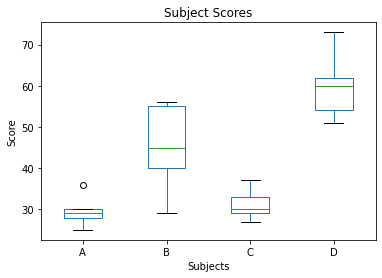

In [10]:
#Download score.xlsx file and save it in Jupyter Notebook folder, DAV.
#Descriptive statistics and boxplot for the dataset. Type the following:
import pandas as pd
from matplotlib import pyplot as plt

dataset = pd.read_excel("score.xlsx")
print(dataset.describe())

dataset.boxplot(column=['A', 'B', 'C', 'D'], grid=False)
plt.title("Subject Scores")
plt.xlabel("Subjects")
plt.ylabel("Score")

#Conduct One-way ANOVA on score.xlsx. We would like to compare the means of Subjects A, B, C, and D. The two hypotheses are as follows:
#Note: for ANOVA, it is only one-tail test
#Null Hypothesis (H0): A mean = B mean = C mean = D mean (all the means of all the subjects are equal to each other);
#Alternative Hypothesis (Ha): At least one of the means for A, B, C, and D is not equal to the other

#We can choose the following confidence level values:
#Confidence Level (95%) or alpha value,  = 0.05
#Confidence Level (98%) or alpha value,  = 0.02
#Confidence Level (99%) or alpha value,  = 0.01

#Type the following codes for one way anova:
import pandas as pd
import scipy.stats as stats

dataset = pd.read_excel("score.xlsx")
fvalue, pvalue = stats.f_oneway(dataset["A"], dataset["B"],dataset["C"], dataset["D"])
print("F Value  = {:g} ".format(fvalue))
print("P Value  = {:g} ".format(pvalue))


In [11]:
#We choose   = 0.05.
#The p value <  = 0.05 so we reject the null hypothesis. The conclusion is that at least one mean for A, B, C, D is significantly different from the rest.


In [12]:
import pandas as pd
import scipy.stats as stats

dataset = pd.read_excel("score.xlsx")
fvalue, pvalue = stats.f_oneway(dataset["A"], dataset["B"],dataset["C"], dataset["D"])
print("F Value  = {:g} ".format(fvalue))
print("P Value  = {:g} ".format(pvalue))

alpha = 0.05

if pvalue < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis is accepted")


F Value  = 17.4928 
P Value  = 2.63924e-05 
The null hypothesis can be rejected


In [14]:
#One Way ANOVA

#Conduct descriptive statistical analysis on dataset in iris.csv. Type the following:
import pandas as pd
import scipy.stats as stats

dataset = pd.read_csv("iris.csv")
groupby_name = dataset.groupby('name')
print(groupby_name.head())
print(groupby_name['petal_width'].describe())
print("\n")
print("\n")

df=groupby_name.describe()
df_transposed = df.T
print(df_transposed)

#You notice there are 3 types of irises by the name: setosa, versicolor, and vriginica.
#We would like to test whether there is any significant difference in the mean of petal width for all the three types of irises. Here we shall use One-Way ANOVA.
#The two hypotheses are as follows:
#Note: for ANOVA, it is only one-tail test
#Null Hypothesis (H0): Setosa petal width mean = Versicolor petal width mean = Virginica petal width mean (all the petal width means for all the irises are equal to each other);
#Alternative Hypothesis (Ha): At least one of the petal width means for the irises is not equal to the other

#We can choose the following confidence level values:
#Confidence Level (95%) or alpha value,  = 0.05
#Confidence Level (98%) or alpha value,  = 0.02
#Confidence Level (99%) or alpha value,  = 0.01

#There are two sets of codes to compare the petal widths of the 3 irises. Type the following codes:
#Set 1
import pandas as pd
import scipy.stats as stats

df = pd.read_csv("iris.csv")
fvalue, pvalue = stats.f_oneway(df['petal_width'][df['name'] == 'setosa'],
                                df['petal_width'][df['name'] == 'versicolor'],
                                df['petal_width'][df['name'] == 'virginica'])
print("F Value  = {:g} ".format(fvalue))
print("P Value  = {:g} ".format(pvalue))



#Interpretation
#Choose an alpha value and draw your conclusion. Just as in previous exercises.


#Set 2 – you store the data in arrays
import pandas as pd
import scipy.stats as stats

df = pd.read_csv("iris.csv")
df2 =(df['petal_width'][df['name'] == 'setosa'],
                       df['petal_width'][df['name'] == 'versicolor'],
                       df['petal_width'][df['name'] == 'virginica'])
fvalue, pvalue = stats.f_oneway(df2[0], df2[1], df2[2])
print("F Value  = {:g} ".format(fvalue))
print("P Value  = {:g} ".format(pvalue))


     sepal_length  sepal_width  petal_length  petal_width        name
0             5.1          3.5           1.4          0.2      setosa
1             4.9          3.0           1.4          0.2      setosa
2             4.7          3.2           1.3          0.2      setosa
3             4.6          3.1           1.5          0.2      setosa
4             5.0          3.6           1.4          0.2      setosa
50            7.0          3.2           4.7          1.4  versicolor
51            6.4          3.2           4.5          1.5  versicolor
52            6.9          3.1           4.9          1.5  versicolor
53            5.5          2.3           4.0          1.3  versicolor
54            6.5          2.8           4.6          1.5  versicolor
100           6.3          3.3           6.0          2.5   virginica
101           5.8          2.7           5.1          1.9   virginica
102           7.1          3.0           5.9          2.1   virginica
103           6.3   

            df      sum_sq     mean_sq          F    PR(>F)
Fitness    1.0  666.216867  666.216867  34.749543  0.000006
Residual  22.0  421.783133   19.171961        NaN       NaN
              sum_sq    df          F    PR(>F)
Fitness   666.216867   1.0  34.749543  0.000006
Residual  421.783133  22.0        NaN       NaN
                sum_sq    df           F        PR(>F)
Intercept  6679.707064   1.0  348.410223  5.611672e-15
Fitness     666.216867   1.0   34.749543  6.230589e-06
Residual    421.783133  22.0         NaN           NaN


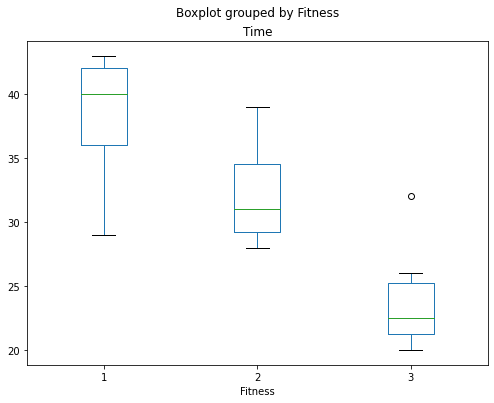

In [15]:
#Example 8.3: One Way ANOVA Table
#Note, we shall use statsmodel and ANOVA linear model and OLS (Ordinary Least Square). We shall revisit these in detail when we conduct regression analysis. Download the rehab.csv file and save it in Jupyter Notebook DAV folder. 

import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

dataset = pd.read_csv("rehab.csv")

#Plot box plots grouped by Fitness - Groups 1, 2, 3
fig, ax = plt.subplots(figsize=(8,6))
fig = dataset.boxplot('Time', 'Fitness', ax = ax, grid=False)

#Sum of Square
sum_lm = ols('Time ~ Fitness', data=dataset).fit()

print(anova_lm(sum_lm))
print(anova_lm(sum_lm, typ=2))
print(anova_lm(sum_lm, typ=3))


In [16]:
#Explanation for Types 1, and 2 Errors
#Type 1 error is rejecting the null hypothesis when you shouldn’t have
#Type 2 error is not rejecting null hypothesis when you should have


    len supp  dose
0   4.2   VC   0.5
1  11.5   VC   0.5
2   7.3   VC   0.5
3   5.8   VC   0.5
4   6.4   VC   0.5


                sum_sq    df           F        PR(>F)
supp        205.350000   1.0   12.317020  8.936452e-04
dose       2224.304298   1.0  133.415146  1.907985e-16
supp:dose    88.920107   1.0    5.333483  2.463136e-02
Residual    933.634929  56.0         NaN           NaN


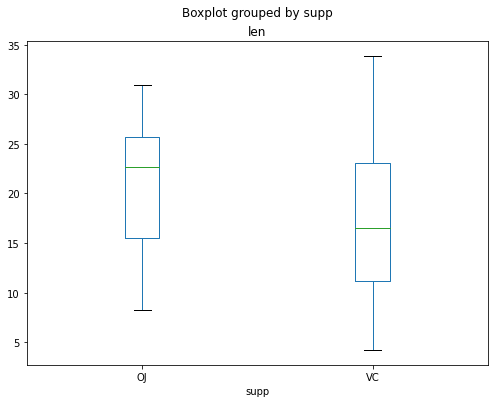

In [17]:
#Example 8.4: Two-Way ANOVA
#The dependent variable is the length of the tooth (LEN); 2 independent variables are the type of supplement(sup) and dosage (dose). 
#https://plotly.com/python/v3/anova/
#Two Way ANOVA
#len - length of tooth,  supp - supplement, dose - dosage
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

dataset = pd.read_excel('tooth_growth.xlsx')
print(dataset.head())

fig, ax = plt.subplots(figsize=(8,6))
fig = dataset.boxplot('len', 'supp', ax = ax, grid=False)

formula = 'len ~ supp + dose + supp *dose'
model = ols(formula, dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n")
print(anova_table)


In [ ]:
#Interpretation
#At a confidence level of 95% (or alpha = 0.05), the interaction between supplement and dose seems to have a significant effect on the length of the tooth (len) because the pvalue of 0.024 > alpha value of 0.05.
